In [1]:
import numpy as np 
import time
import math
from matplotlib import pyplot as plt
import matplotlib

In [2]:
from imaging_functions import show_map, show_map_3d
from noise_functions import perlin_generator, julia, my_perl
from mountains import mountain, voron_mountain
from landscape import landscape_gen

0.12017748669546818
5.8803482461544245


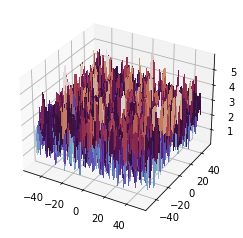

In [4]:
X, Y, Z = show_map_3d(my_perl, 200,200,0.5,neg_octaves=2,octaves=0, voron=True)

print(np.min(Z))
print(np.max(Z))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap = matplotlib.cm.twilight, antialiased=False)
plt.show()

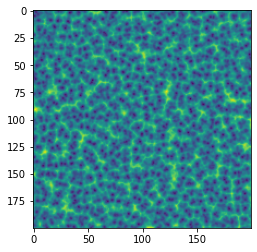

In [5]:
plt.imshow(Z)

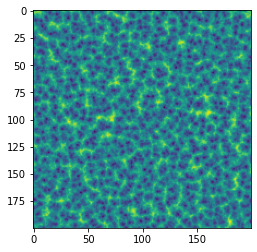

In [14]:
plt.imshow(Z)

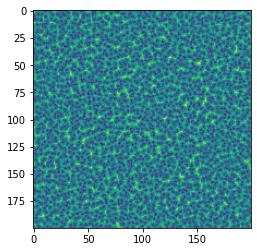

In [12]:
plt.imshow(Z)

In [3]:
class perlin_generator(): #NOTE: this is not yet Perlin noise, but is already computationally intensive
    
    def __init__(self,x=128,y=128,max_oct=20):
        self.pattern_ref = np.random.rand(x,y,3)*2 -1 #array of random values between -1 and 1
        self.cos_lut = [math.cos(2*i) for i in range(max_oct)] #used instead of calculating trig functions per pixel at runtime
        self.sin_lut = [math.sin(2*i) for i in range(max_oct)]
        #for i in range(max_oct): #so that negative values of i correspond to negative angles
        #    self.cos_lut.append(math.cos(2*(i-max_oct)))
        #    self.sin_lut.append(math.sin(2*(i-max_oct)))
            
    def pattern(self,x:int,y:int,ndims=3) ->float:
        return(self.pattern_ref[x%self.pattern_ref.shape[0]][y%self.pattern_ref.shape[1]][0:ndims])
        #Converts this version back to old method (pregen noise pattern) 
        
        #This is an attempt at procedural noise, but it produces too many artifacts to replace the pattern method
        primes = [4937,6053,5843,6701,6133,7919,7823,5281,5407,5443]
        output = np.zeros(ndims)
        for i in range(ndims):
            output[i] = 0.5 - ((x*(y+i+3)*7717 + y*(x+10*i)*7907*7717)%primes[i])/primes[i] #Pseudorandom output between -0.5 and 0.5
        return(output)
        
    def base_sample(self,x,y): #ADD PERLIN SAMPLER HERE
        a = self.pattern(math.floor(x),math.floor(y))
        b = self.pattern(math.floor(x),(math.floor(y)+1))
        c = self.pattern((math.floor(x)+1),math.floor(y))
        d = self.pattern((math.floor(x)+1),(math.floor(y)+1))
        
        weights = [1-x%1, x%1, 1-y%1, y%1]
        
        a = a*(weights[0]*weights[2])
        b = b*(weights[0]*weights[3])
        c = c*(weights[1]*weights[2])
        d = d*(weights[1]*weights[3])
        
        s = a+b+c+d
        
        return(s)#abs(s)*s*(3-2*s))
    
    
    def sample(self,x,y,octaves=1,neg_octaves=0, fade=0.5,voron=False):
        output = np.asarray([0,0,0])
        for i in range(neg_octaves*-1, octaves):
            coords = np.asarray([x*2**i,y*2**i])
            c = self.cos_lut[i] #faster than recalculating every time, but does give a different angle for negative i values
            s = self.sin_lut[i]
            qx = c * coords[0] - s * coords[1]
            qy = s * coords[0] + c * coords[1]
            if voron:
                output = output+ self.voron(qx,qy)*fade**i
            else:
                output = output+ self.base_sample(qx,qy)*fade**i
        return(output)
    
    def get_height(self,x,y,channel=-1, **kwargs):
        #return(self.voron(x,y)) #Temporary, to test Worley noise
        return(self.sample(x,y,**kwargs)[channel])
    
    def voron(self,x:float,y:float,randomness = 0.5) -> float: #Create a voronoi (or Worley noise) pattern from the same starting pattern, returning distance to nearest centroid
        loc = np.asarray([x,y]) #Actual location of sampled point within the pattern (looped over x and y limits of pattern)
        x = math.floor(x)
        y = math.floor(y)
        sqdist = 100
        dist=10 #Instantiate distance as something (hopefully?) larger than all distances
        for x_off in range(-1,3):
            for y_off in range(-1,3):
                centr = np.asarray([x+x_off,y+y_off])
                centroid = np.add(centr, self.pattern(centr[0],centr[1],2)*randomness) #get the random offset of that location in the pattern. Pattern is -1 to 1, scale by 0.5 keeps points from overlapping
                centroid = np.add(centroid * -1, loc) #calculate vector between this centroid and the sampled location
                new_sq = centroid[0]**2 + centroid[1]**2
                if sqdist > new_sq: #Only calculate real distance is square
                    sqdist = new_sq
                    dist = min(dist, np.linalg.norm(centroid))#If this centroid is closer than previous, keep this distance (always a closest neighbour search, second closest neighbour not used here
        return(dist)
        
my_perl = perlin_generator()       

In [114]:
my_perl = perlin_generator()

In [155]:
my_perl.pattern_ref[3][2][0:2]

array([ 0.42599397, -0.4170166 ])

In [49]:
math.cos(4)

-0.6536436208636119

2.0
0.0
2.0


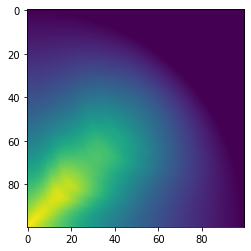

In [6]:
print(my_mountain.get_height(1,2))
X, Y, Z = show_map_3d(my_mountain, 100,100,0.02,[2,1])#0.04,[1,2])#

print(np.min(Z))
print(np.max(Z))
plt.imshow(Z)

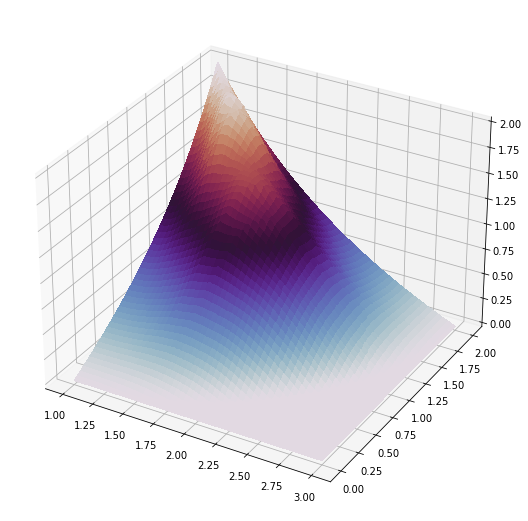

In [12]:

#fig, ax = plt.subplots(subplot_kw={"projection": "3d", "fig_size": (20,20)})

fig = plt.figure(figsize=(20,20))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap = matplotlib.cm.twilight, antialiased=False)

#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [4]:
my_mountain = voron_mountain(1,2,size=9,erosion = 0.1)

4.716194628827957
0.0
4.947152954480191


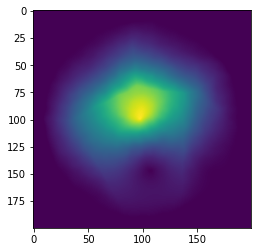

In [5]:
print(my_mountain.get_height(1,2))
X, Y, Z = show_map_3d(my_mountain, 200,200,0.1,[1,2])#
print(np.min(Z))
print(np.max(Z))
plt.imshow(Z)

-2.630639232746405
3.4515294086507233


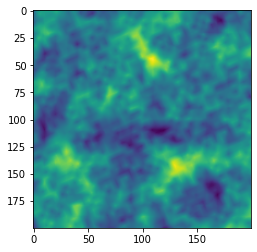

In [242]:

X, Y, Z = show_map_3d(my_perl, 200,200,0.1,[1,2],octaves=2,neg_octaves = 2, fade=0.75)#
print(np.min(Z))
print(np.max(Z))
plt.imshow(Z)

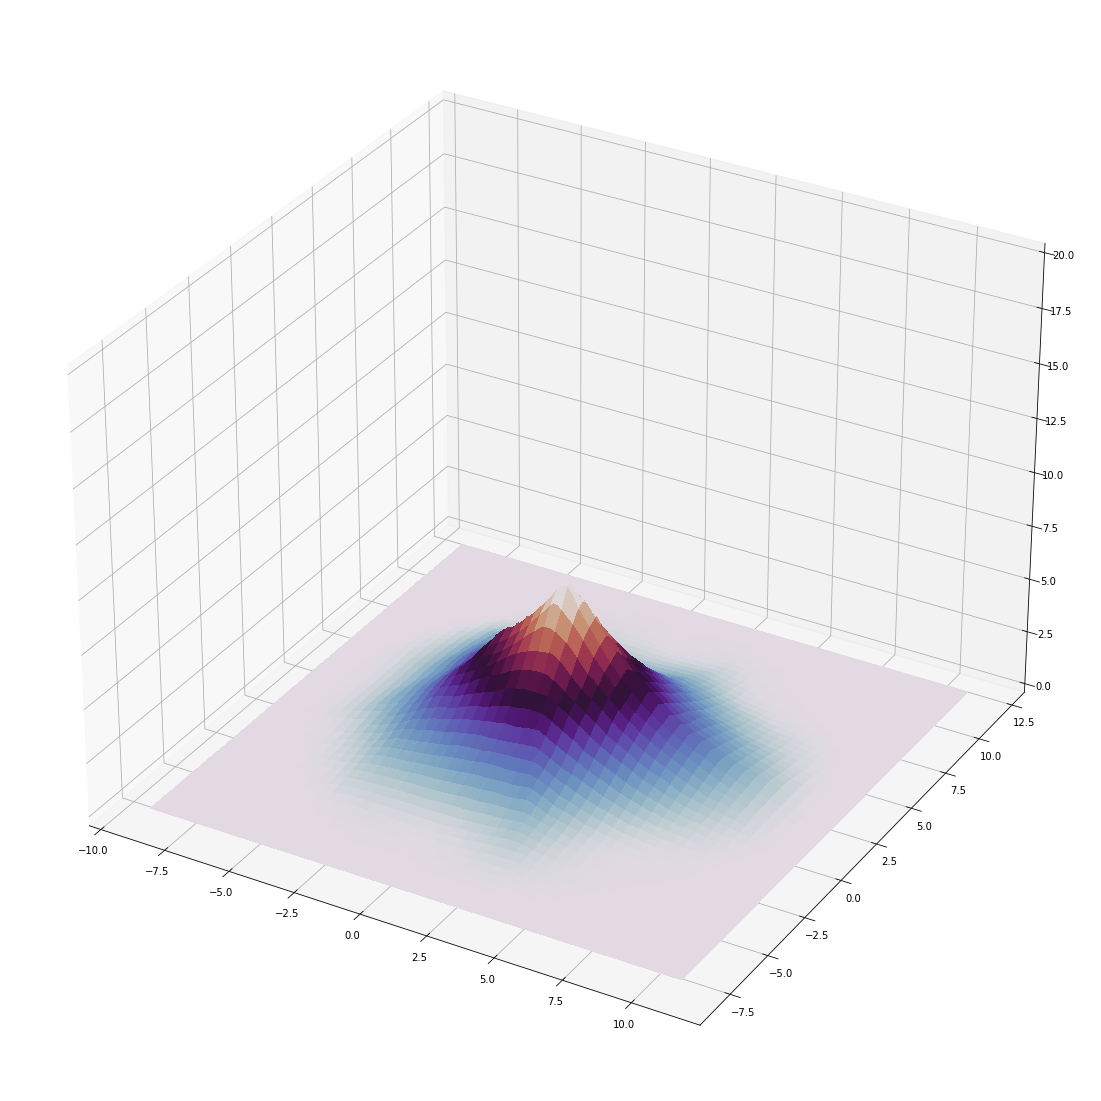

In [14]:
fig = plt.figure(figsize=(20,20))


ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap = matplotlib.cm.twilight, antialiased=False)
ax.set_zlim(0,20)
plt.show()

In [6]:
my_landscape = landscape_gen(200,200,num_plates=10)

In [7]:
start = time.time()
X,Y,Z = show_map_3d(my_landscape,10,10,0.02,[my_landscape.lat*0.5,my_landscape.long*0.5])
print(np.min(Z))

print(np.max(Z))
end = time.time()
print(end-start)


0.7965269082673117
0.7965269082673117
0.030916690826416016


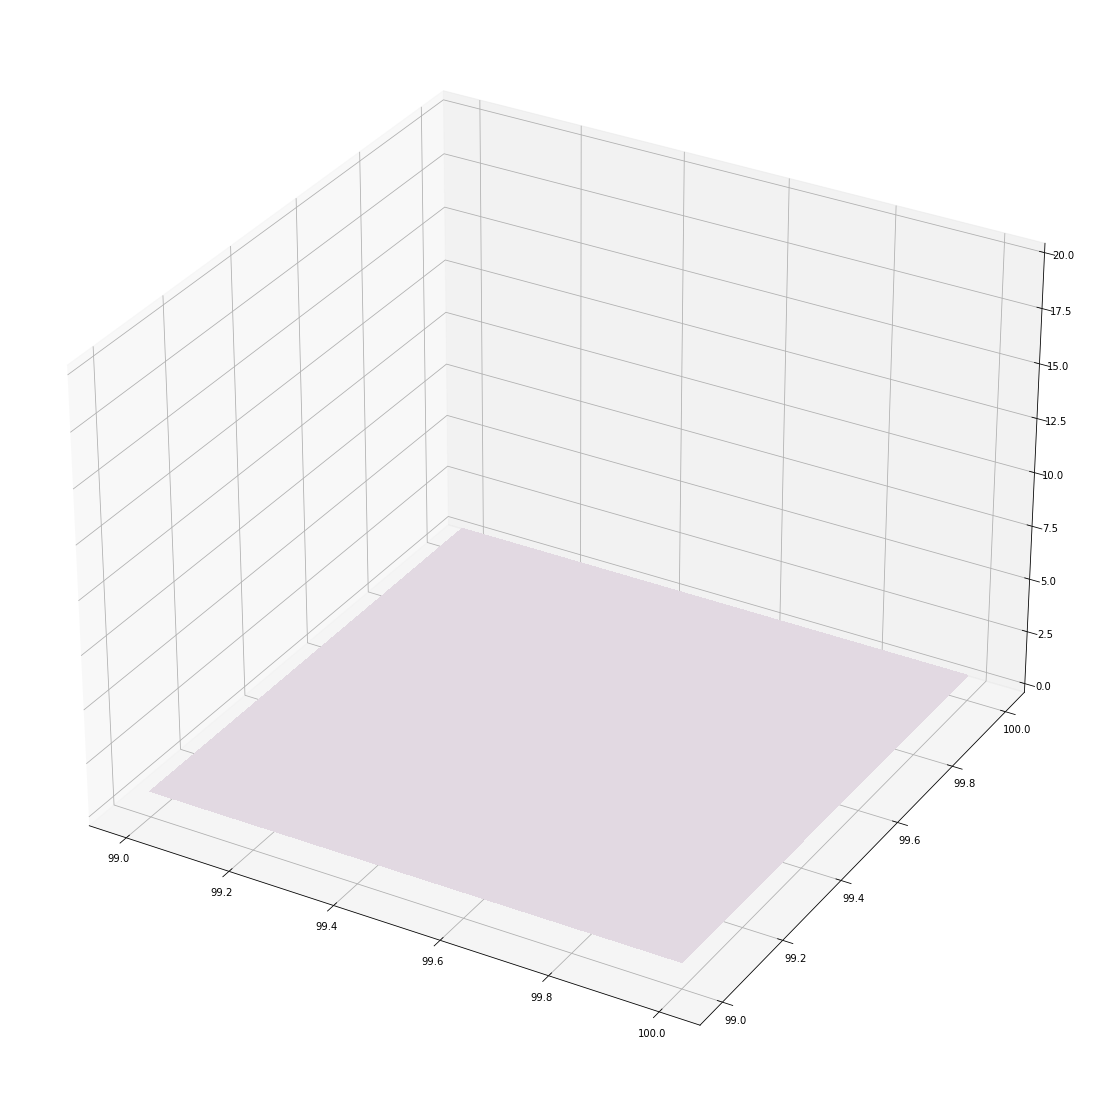

In [8]:
fig = plt.figure(figsize=(20,20))
# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap = matplotlib.cm.twilight, antialiased=False)

ax.set_zlim(0, 20)

#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

C:\Users\eddie\AppData\Local\Temp/ipykernel_1712/20185634.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asarray(my_landscape.mountains_tiled)


(668, 668)

6411

TypeError: 'int' object is not iterable

In [ ]:
start = time.time()
graphic_1 = show_map(my_landscape,2000,2000,1,[my_landscape.lat*0.5,my_landscape.long*0.5])
print(np.min(graphic_1))

print(np.max(graphic_1))

end = time.time()
print(end-start)
plt.figure(figsize = (20,20))
plt.imshow(graphic_1)

In [363]:
for i in range(100):
    graphic = show_map(my_landscape,20,20,10/(i+1),[1000 + 0.36*i, 1000 - 6.69*i])
    graphic = graphic / np.max(graphic)
    graphic = graphic - np.min(graphic)
    graphic = graphic * 255
    graphic = graphic.astype(np.uint8)
    cv2.imwrite(f"Documents/Blender Projects/mountain generator/python_images/{i}_{min(graphic)}_to_{max(graphic)}.png",graphic)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [339]:
1000-331.45

668.55